In [1]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import glob 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def connectcsv(files_path):
    dfs = []
    for file in files_path:
        df = pd.read_csv(file)
        selected_columns = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng','member_casual']
        df = df[selected_columns]
        df = df.dropna()
        df['start_lat'] = df['start_lat'].astype('float64')
        df['start_lng'] = df['start_lng'].astype('float64')
        df['end_lat'] = df['end_lat'].astype('float64')
        df['end_lng'] = df['end_lng'].astype('float64')
        #encode member_casual column
        df['member_casual'] = df['member_casual'].map({'member': 0, 'casual': 1})
        #df = df.sample(n=1000)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [3]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).miles

In [4]:
data_2020 = connectcsv(sorted(glob.glob('../Data/part2/2020*.csv')))
data_2020['distance_miles'] = data_2020.apply(calculate_distance, axis=1)
data_2020.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,77A0F1B26D1597B1,38.905996,-77.039802,38.903819,-77.028400,1,0.632638
1,8698F10128EA4F18,38.900711,-77.046449,38.903741,-77.042452,0,0.300189
2,AA07819DC0F58872,38.941139,-77.061977,38.941139,-77.061977,1,0.000000
3,DA909BCA92EF85AB,38.883450,-77.021741,38.883450,-77.021741,1,0.000000
4,B36F1E14D8C6757E,38.880300,-76.986200,38.879200,-76.995300,0,0.496488
...,...,...,...,...,...,...,...
1673028,A10ED3D50E5AB612,38.888553,-77.032427,38.892300,-77.043600,1,0.655452
1673029,F146CC9669ABF5EC,38.888553,-77.032427,38.890496,-77.017247,1,0.829268
1673030,614005BC98FE93F7,38.888552,-77.032427,38.892300,-77.043600,1,0.655479
1673031,86783BF38F4567FA,38.888553,-77.032427,38.898283,-77.039732,1,0.778177


In [5]:
data_2021 = connectcsv(sorted(glob.glob('../Data/part2/2021*.csv')))
data_2021['distance_miles'] = data_2021.apply(calculate_distance, axis=1)
data_2021.head()

/var/folders/4f/565zs95x5xb988rb96g8px_40000gn/T/ipykernel_24425/357100860.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,13A48BD20CC3DD85,38.947156,-77.065115,38.949662,-77.027333,1,2.042502
1,CA68C580B32EEE66,38.894804,-77.023091,38.884053,-76.986043,0,2.130540
2,5A925307814D5C2B,38.879477,-77.114563,38.878870,-77.120700,0,0.333518
3,B6B2DB54A2B233EE,38.798133,-77.048700,38.814577,-77.052808,0,1.155767
4,921A142D5C8A9759,38.814185,-77.043809,38.814577,-77.052808,1,0.486406


In [6]:
data_2022 = connectcsv(sorted(glob.glob('../Data/part2/2022*.csv')))
data_2022['distance_miles'] = data_2022.apply(calculate_distance, axis=1)
data_2022.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,1B4445D591115BD9,38.820932,-77.053096,38.822738,-77.049265,0,0.241363
1,7F4A0E2F03EADEB7,38.903658,-77.031737,38.898243,-77.026235,0,0.476916
2,30DD8A84164843AD,38.903658,-77.031737,38.903819,-77.028400,0,0.180207
3,FC67665D7682D0A6,38.915604,-76.983683,38.901385,-76.941877,1,2.457422
4,7854F7CC4F631A1E,38.885434,-77.173605,38.887403,-77.176992,0,0.227578


In [7]:
combined_df = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)
combined_df.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles
0,77A0F1B26D1597B1,38.905996,-77.039802,38.903819,-77.028400,1,0.632638
1,8698F10128EA4F18,38.900711,-77.046449,38.903741,-77.042452,0,0.300189
2,AA07819DC0F58872,38.941139,-77.061977,38.941139,-77.061977,1,0.000000
3,DA909BCA92EF85AB,38.883450,-77.021741,38.883450,-77.021741,1,0.000000
4,B36F1E14D8C6757E,38.880300,-76.986200,38.879200,-76.995300,0,0.496488


## Random Forest Classifier

/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Accuracy: 0.7021605094766304


/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

              precision    recall  f1-score   support

           0       0.71      0.82      0.76    912549
           1       0.69      0.54      0.60    665227

    accuracy                           0.70   1577776
   macro avg       0.70      0.68      0.68   1577776
weighted avg       0.70      0.70      0.70   1577776



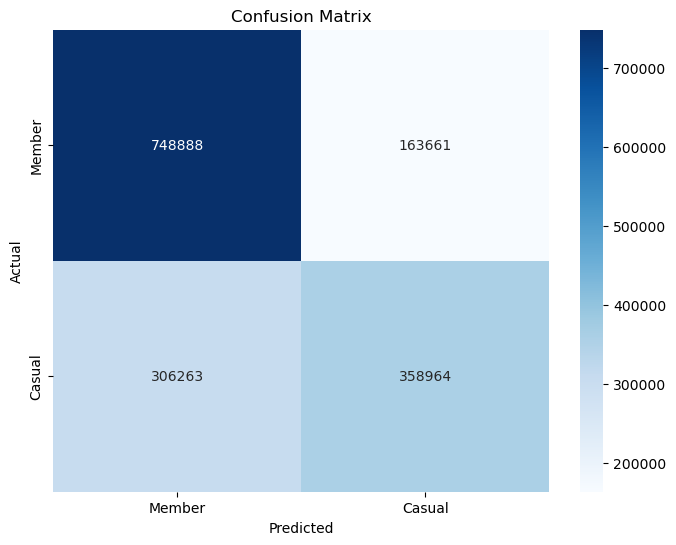

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Selecting the relevant features and the target variable
features = combined_df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance_miles']]
target = combined_df['member_casual']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generating a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Member', 'Casual'], 
            yticklabels=['Member', 'Casual'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
X = combined_df[['distance_miles', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]
y = combined_df['member_casual']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Visualize the decision tree
# Requires additional installation: pip install graphviz
# from sklearn.tree import export_graphviz
# import graphviz
# dot_data = export_graphviz(clf, out_file=None, 
#                            feature_names=iris.feature_names,  
#                            class_names=iris.target_names,  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("iris") 


/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[[1121192  246684]
 [ 471281  527506]]


/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jackyzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

              precision    recall  f1-score   support

           0       0.70      0.82      0.76   1367876
           1       0.68      0.53      0.60    998787

    accuracy                           0.70   2366663
   macro avg       0.69      0.67      0.68   2366663
weighted avg       0.69      0.70      0.69   2366663

